In [3]:
%reload_ext autoreload
%autoreload 2

# Imports

In [4]:
from kret_notebook import *  # NOTE import first
from kret_matplotlib.mpl_nb_imports import *
from kret_np_pd.np_pd_nb_imports import *
from kret_polars.polars_nb_imports import *
from kret_rosetta.rosetta_nb_imports import *
from kret_lgbm.lgbm_nb_imports import *
from kret_sklearn.sklearn_nb_imports import *
from kret_torch_utils.torch_nb_imports import *
from kret_lightning.lightning_nb_imports import *
from kret_tqdm.tqdm_nb_imports import *
from kret_type_hints.types_nb_imports import *
from kret_utils.utils_nb_imports import *

# from kret_wandb.wandb_nb_imports import *  # NOTE this is slow to import

In [8]:
print(str(DATA_DIR))

/Users/Akseldkw/coding/data_kretsinger


# Load Data

In [ ]:
metrics_path = UKS_CONSTANTS.LIGHTNING_LOG_DIR / "BeijingAirQualityLSTM/v_000/metrics.csv"

In [21]:
print(str(metrics_path))

/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000/metrics.csv


In [16]:
metrics_df = pd.read_csv(metrics_path)
df = metrics_df

In [17]:
dtt(df)

,epoch,step,train_loss_epoch,train_loss_step,val_loss,validate_MAE,validate_MSE,validate_R2
,int64,int64,float64,float64,float64,float64,float64,float64
96,1,949,NaN,0.049,NaN,NaN,NaN,NaN
130,2,1269,NaN,0.043,NaN,NaN,NaN,NaN
199,3,1939,NaN,0.043,NaN,NaN,NaN,NaN
212,3,2069,NaN,0.054,NaN,NaN,NaN,NaN
320,5,3109,NaN,0.040,NaN,NaN,NaN,NaN


In [19]:
nans = UKS_NP_PD.nan_filter(df)

In [20]:
nans.mean()

np.float64(1.0)

In [25]:
f_r2 = ~df.validate_R2.isna().to_numpy(bool)
f_r2.sum()

np.int64(6)

In [ ]:
dtt(df, filter=f_r2, n=10)

,epoch,step,train_loss_epoch,train_loss_step,val_loss,validate_MAE,validate_MSE,validate_R2
,int64,int64,float64,float64,float64,float64,float64,float64
52,0,521,NaN,NaN,0.047,0.181,0.047,0.887
106,1,1043,NaN,NaN,0.044,0.165,0.044,0.916
160,2,1565,NaN,NaN,0.045,0.175,0.045,0.903
214,3,2087,NaN,NaN,0.017,0.105,0.017,0.946
269,4,2609,NaN,NaN,0.038,0.146,0.038,0.943
323,5,3131,NaN,NaN,0.016,0.113,0.016,0.958


# Sandbox

In [ ]:
fig, ax = UKS_MPL.subplots(2, 1)

In [ ]:
ax[0].plot(df.validate_R2[f_r2], label="r2")
ax[1].plot(df.validate_MAE[f_r2], label="mae")
ax[1].plot(df.validate_MSE[f_r2], label="MSE")
...

Ellipsis

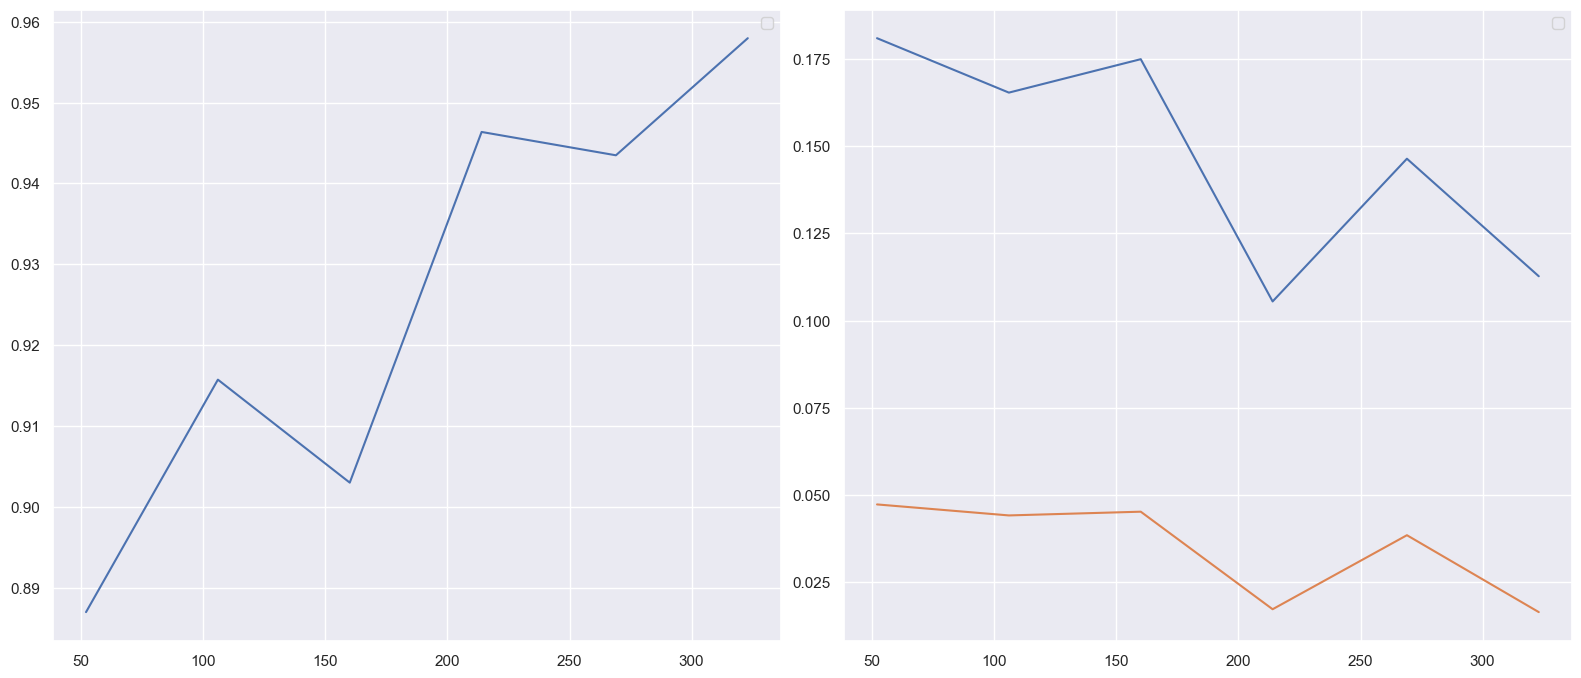

In [34]:
fig